In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
train=pd.read_csv('Train.csv')

In [151]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [152]:
test=pd.read_csv('Test.csv')

In [153]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [154]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [155]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [156]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [157]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

# Data Cleaning

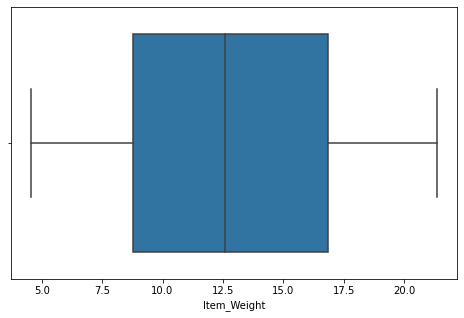

In [158]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Item_Weight',data=train)
plt.show()

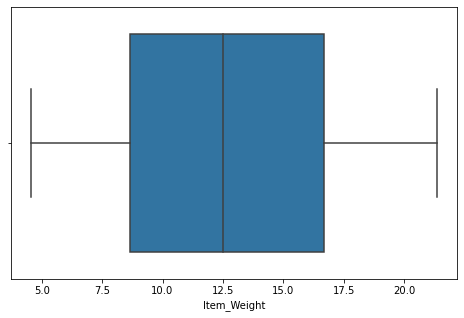

In [159]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Item_Weight',data=test)
plt.show()

In [160]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [161]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

In [162]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [163]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [164]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.

In [165]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [166]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Outlet_Size.

In [167]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [168]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

We see there are some irregularities in the column and it is needed to fix them.

In [169]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [170]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [171]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

# Exploratory Data Analysis

Analysis on Categorical Features

In [172]:
categorical = train.select_dtypes(include =[object])
print(categorical.shape[1],"Categorical Features in Train Set are :")
print('\t'+'\n\t'.join(categorical.columns)+"\n")

7 Categorical Features in Train Set are :
	Item_Identifier
	Item_Fat_Content
	Item_Type
	Outlet_Identifier
	Outlet_Size
	Outlet_Location_Type
	Outlet_Type



Item_Identifier and Outlet_Identifier are just id, don't have any relation with Sales

Item Fat Content

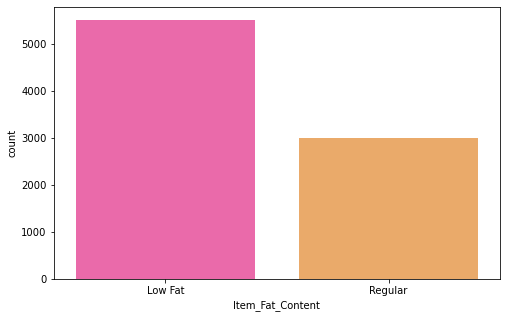

In [173]:
plt.figure(figsize=(8,5))
sns.countplot(data=train, x="Item_Fat_Content", palette='spring')
plt.show()

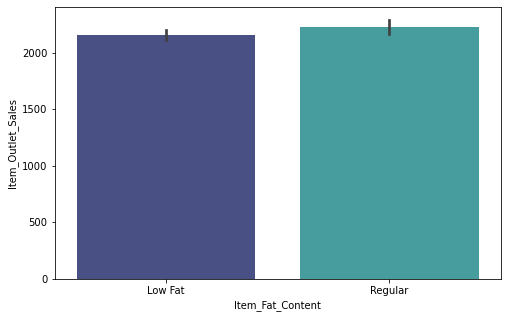

In [174]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data=train,palette='mako')
plt.show()

Observations:
* The Items bought are more of Low Fat.
* But Item Outles sales are almost same for both Low Fat and Regular Item Content

# Item Type:

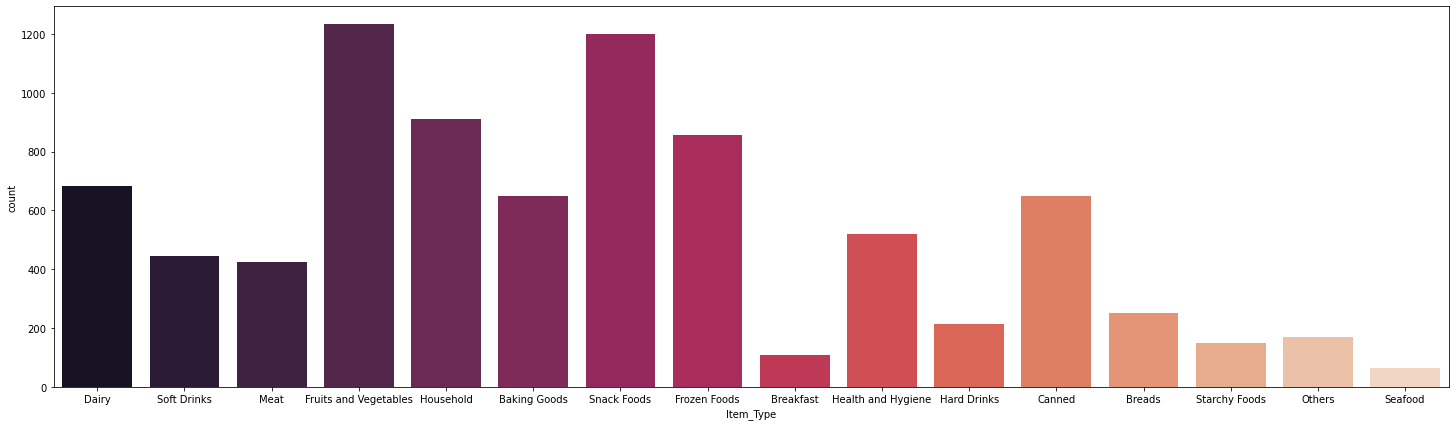

In [175]:
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type',data=train, palette='rocket')
plt.show()

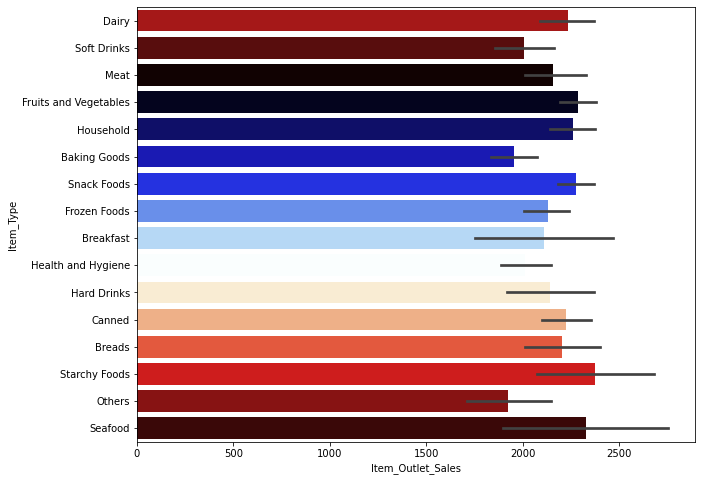

In [176]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')
plt.show()

# Observations :

The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers

# Outlet Size

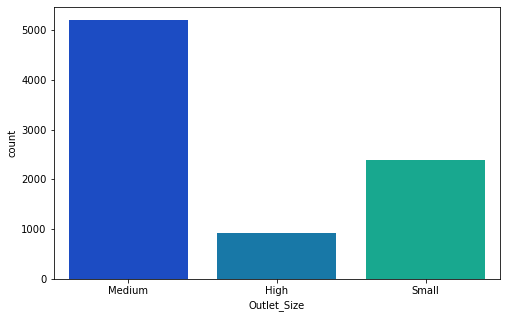

In [177]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Size',data=train,palette='winter')
plt.show()

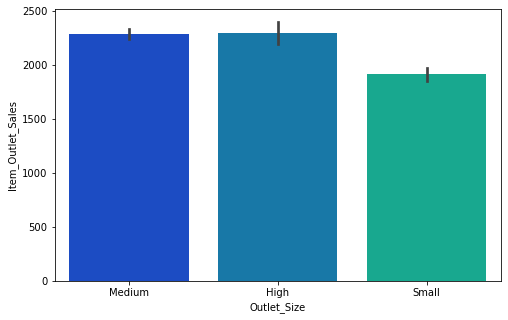

In [178]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,palette='winter')
plt.show()

# Observations:

* The Outlets are more of Medium Size
* But Outlet Sales is maximum for Medium and High sized Outlets so may be with High size Outlets can improve the Outlet Sales.

# Outlet Location Type

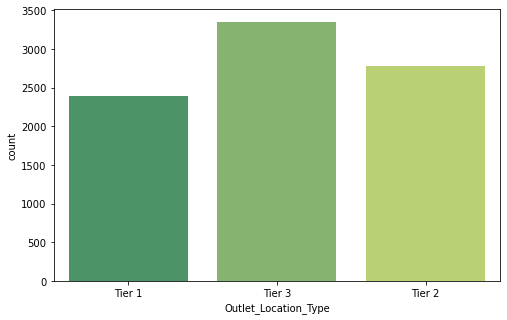

In [179]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Location_Type',data=train,palette='summer')
plt.show()

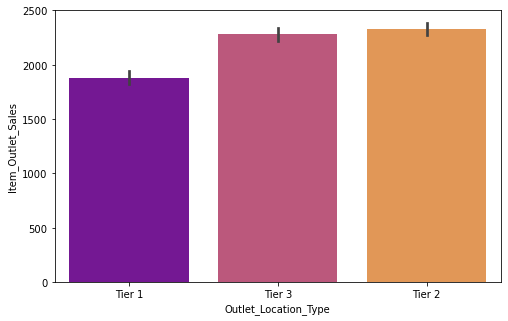

In [180]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='plasma')
plt.show()

# Observations:

* The Outlet Sales tend to be high for Tier3 and Tier 2 location types 
* But we have only Tier3 locations maximum Outlets

# Outlet Type

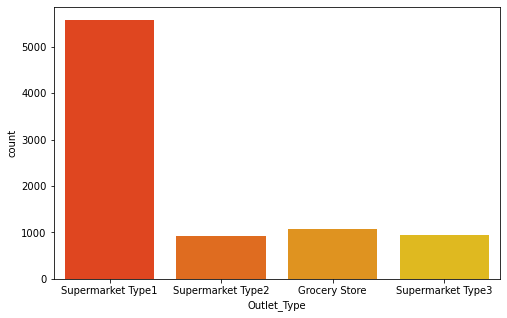

In [181]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=train,palette='autumn')
plt.show()

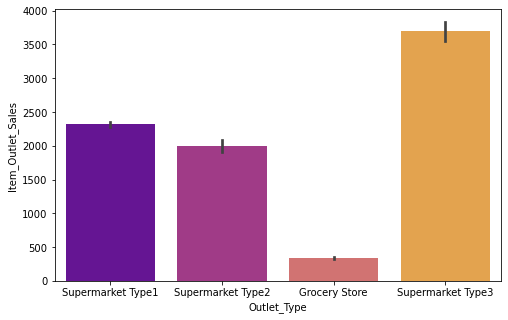

In [182]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train,palette='plasma')
plt.show()

# Observations:

* The Outlets are more of Supermarket Type1.
* But sales are more on Type 3

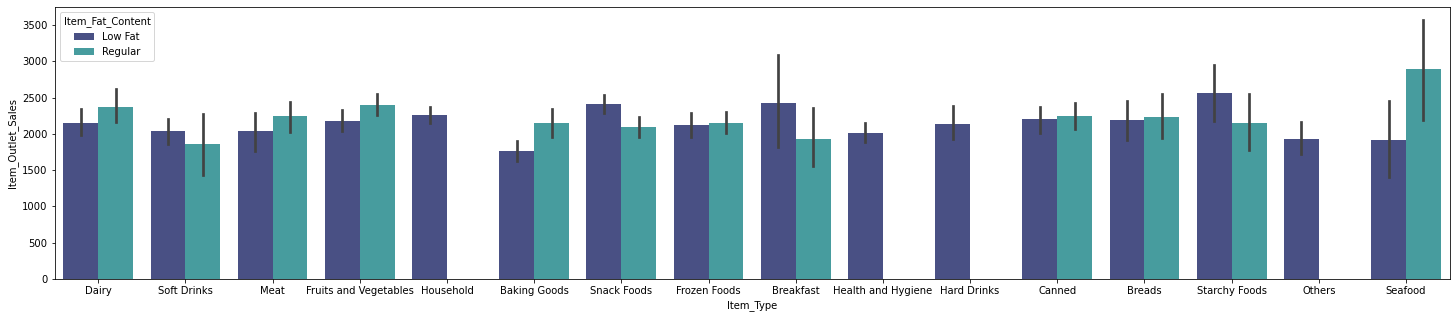

In [183]:
plt.figure(figsize=(25,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.show()

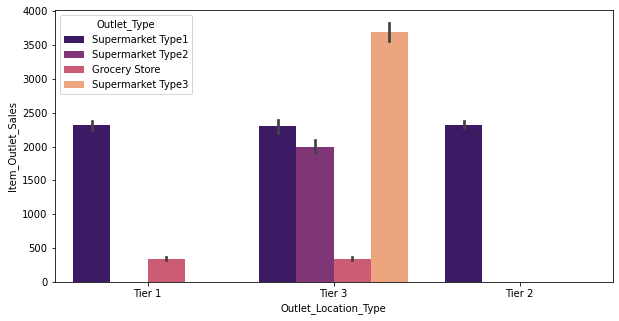

In [184]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.show()

# Observations:

* The Tier-3 location type has all types of Outlet type and has high sales margin.

# Analysis on Numerical Features

In [185]:
numerical= train.select_dtypes(include =[float,int])
print(numerical.shape[1],"Numerical Features in Train Set :")
print('\t'+'\n\t'.join(numerical.columns)+"\n")

4 Numerical Features in Train Set :
	Item_Weight
	Item_Visibility
	Item_MRP
	Item_Outlet_Sales



# 1. Item Weight

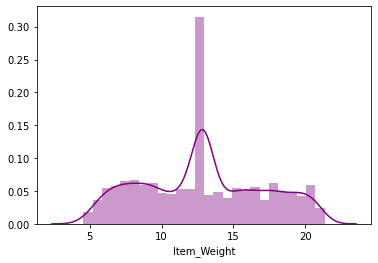

In [186]:
sns.distplot(train.Item_Weight, color='purple', kde=True)

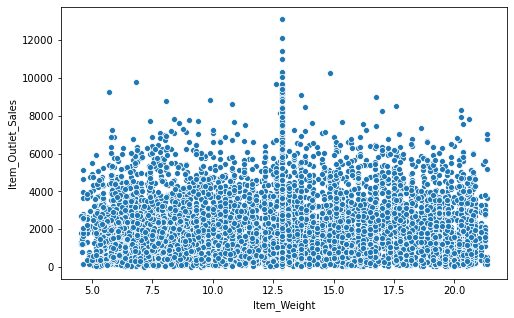

In [187]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=train)
plt.show()

# Observations:

* We have more products of weight around 12.5, and sell is maximum for that weight

# 2. Item Visibility

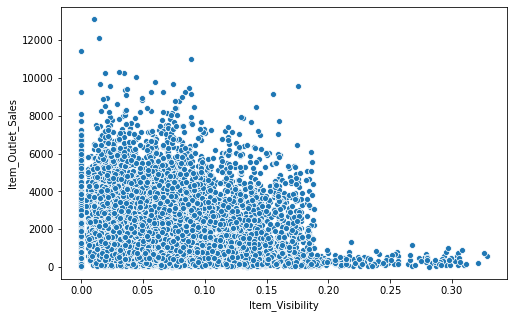

In [188]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)
plt.show()

In [189]:
train.Item_Visibility.min()

0.0

Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

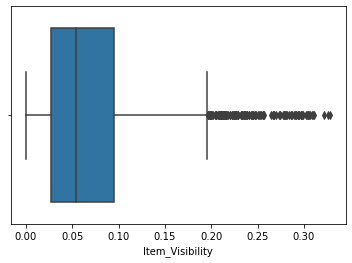

In [190]:
sns.boxplot(x="Item_Visibility", data=train)
plt.show()

In [191]:
train['Item_Visibility'].mean()

0.06613202877895127

In [192]:
train['Item_Visibility'].mode()

0    0.0
dtype: float64

In [193]:
train['Item_Visibility'].median()

0.05393093400000001

Let us consider it like missing information and impute it with median (as there are outlier) visibility of that product

In [194]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].median())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].median())

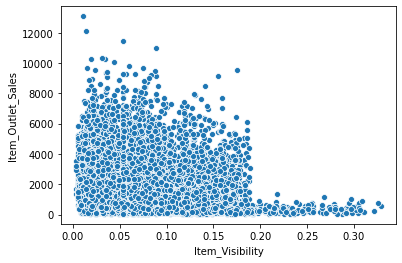

In [195]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)
plt.show()

In [196]:
train.Item_Visibility.min()

0.003574698

We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers

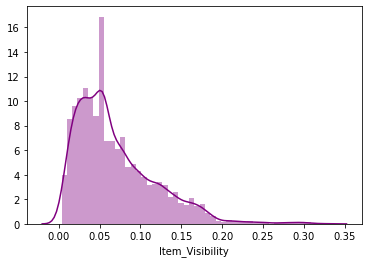

In [197]:
sns.distplot(train.Item_Visibility, color='purple', kde=True)
plt.show()

# Observation:

* We have Items having Visibility 0 to 0.2 is more.
* And Items having Visibility around 0.05 is maximum.
* Sales is more for Items having Visibility 0 to 0.2
* Positive skewness

#                                           Remove Skewness

Skewness in variables is undesirable for predictive modeling. Some machine learning methods assume normally distributed data and a skewed variable can be transformed by taking its log, square root, or cube root so as to make its distribution as close to normal distribution as possible.

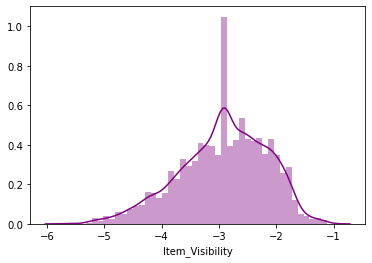

In [198]:
sns.distplot(np.log(train.Item_Visibility), color='purple', kde=True)
plt.show()

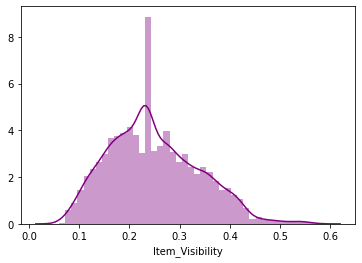

In [199]:
sns.distplot(np.sqrt(train.Item_Visibility), color='purple', kde=True)
plt.show()

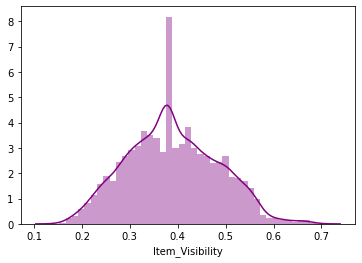

In [200]:
sns.distplot(np.cbrt(train.Item_Visibility), color='purple', kde=True)
plt.show()

In [201]:
train['Item_Visibility'] = np.cbrt(train['Item_Visibility'])

# 3. Item MRP

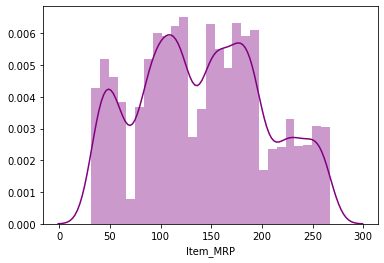

In [202]:
sns.distplot(train.Item_MRP, color='purple', kde=True)
plt.show()

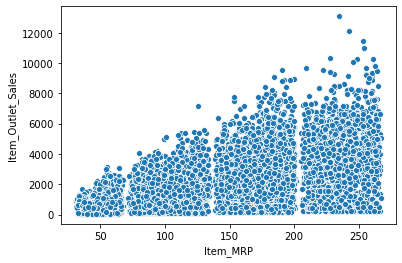

In [203]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)
plt.show()

# Observations:

   * We have good amount of products for 50 MRP, 100 MRP ,180 MRP
   * But MRP ranging from 200-250 dollars is having high Sales.

# 4. Outlet Establishment Year

In [204]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2022 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)

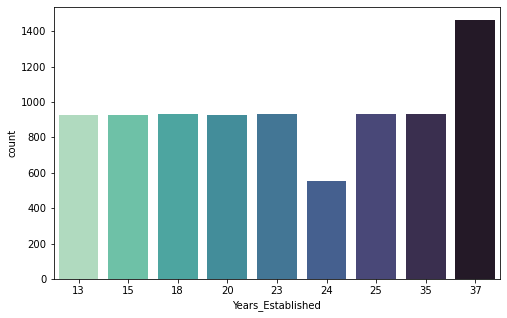

In [205]:
plt.figure(figsize=(8,5))
sns.countplot(x='Years_Established',data=train,palette='mako_r')
plt.show()

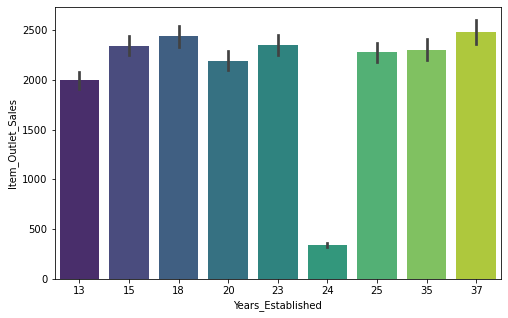

In [206]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train,palette='viridis')

# Observations:

*    It is quiet evident that Outlets established 35 years before is having good Sales margin.
* We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.


# Correlation Matrix

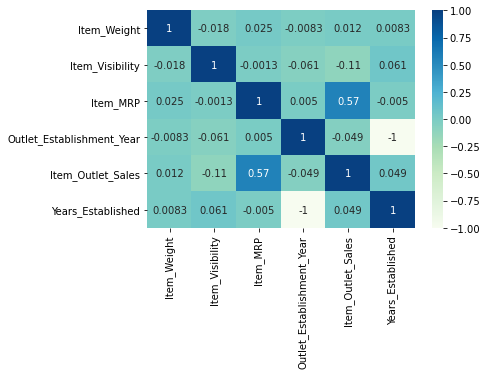

In [207]:
# plt.figure(figsize=(12,12))
sns.heatmap(train.corr() ,cmap='GnBu', annot=True)
plt.show()

We can see Item_Outlet_Sales is highly correlated with Item_MRP, i.e. if Item_MRP increases, Item_Outlet_Sales increases.

## <div style="background-color: #3B9AE1; color: white; height: 60px; font-size: 35px; padding: 10px" align="center">Feature Engineering</div>

In [208]:
from sklearn.preprocessing import LabelEncoder

In [209]:
le = LabelEncoder()

for i in categorical.columns:
    train[i] = le.fit_transform(train[i])
    
for i in categorical.columns:
    test[i] = le.fit_transform(test[i])

In [210]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.30,0,0.252232,4,249.8092,9,1999,1,0,1,3735.1380,23
1,8,5.92,1,0.268136,14,48.2692,3,2009,1,2,2,443.4228,13
2,662,17.50,0,0.255913,10,141.6180,9,1999,1,0,1,2097.2700,23
3,1121,19.20,1,0.377815,6,182.0950,0,1998,1,2,0,732.3800,24
4,1297,8.93,0,0.377815,9,53.8614,1,1987,0,2,1,994.7052,35


**<center>There are some columns that needs to be dropped as they don't seem to be helping our analysis</center>**

In [211]:
train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1, inplace=True)
test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1, inplace=True)

In [212]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,0,0.252232,4,249.8092,1,0,1,3735.1380,23
1,5.92,1,0.268136,14,48.2692,1,2,2,443.4228,13
2,17.50,0,0.255913,10,141.6180,1,0,1,2097.2700,23
3,19.20,1,0.377815,6,182.0950,1,2,0,732.3800,24
4,8.93,0,0.377815,9,53.8614,0,2,1,994.7052,35


## <div style="background-color: #3B9AE1; color: white; height: 60px; font-size: 35px; padding: 10px" align="center">How we do Predictions ?</div>

We basically estimate the relationships between dependent & independent variables. After that we predict value of Dependent variable.

### * **In this problem Independent variables are:**

* Item_Identifier
* Item_Weight
* Item_Fat_Content
* Item_Visibility
* Item_Type
* Item_MRP

### * **Dependent Variable:**
* Item_Outlet_Sales

We have to predict value of **Item_Outlet_Sales**

In [213]:
X = train.drop(columns=["Item_Outlet_Sales"])        # Independent Variables
y = train.Item_Outlet_Sales                          # Dependent Variables

## <div style="background-color: #3B9AE1; color: white; height: 60px; font-size: 35px; padding: 10px" align="center">Feature Scaling</div>

In [214]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# 1. Item Weight

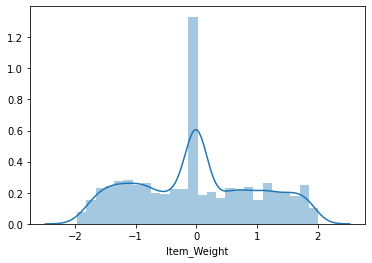

In [215]:
standard_Item_Weight = StandardScaler()
standard_Item_Weight.fit(X[['Item_Weight']])

X['Item_Weight'] =  standard_Item_Weight.transform(X[['Item_Weight']])

sns.distplot(X.Item_Weight, kde=True)
plt.show()

In [216]:
standard_Item_Weight.mean_

array([12.85764518])

In [217]:
test['Item_Weight'] = standard_Item_Weight.transform(test[['Item_Weight']])

# 2. Item Visibility

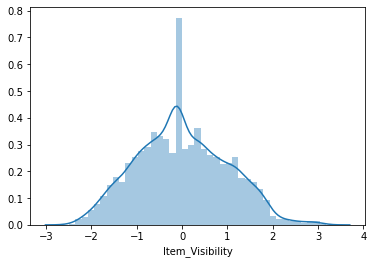

In [218]:
standard_Item_Visibility = StandardScaler()
X['Item_Visibility'] = standard_Item_Visibility.fit_transform(X[['Item_Visibility']])
sns.distplot(X.Item_Visibility, kde=True)
plt.show()

In [219]:
standard_Item_Visibility.mean_

array([0.38903291])

In [220]:
test['Item_Visibility'] = standard_Item_Visibility.transform(test[['Item_Visibility']])

# 3. Item MRP

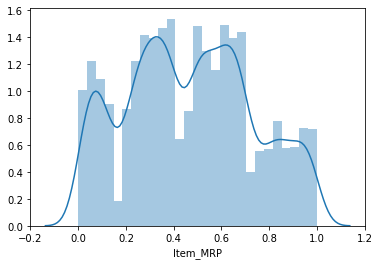

In [221]:
normal_Item_MRP = MinMaxScaler()
X['Item_MRP'] = normal_Item_MRP.fit_transform(X[['Item_MRP']])
sns.distplot(X.Item_MRP, kde=True)
plt.show()

In [222]:
test['Item_MRP'] = normal_Item_MRP.transform(test[['Item_MRP']])

In [223]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,-0.841872,0,-1.446573,4,0.927507,1,0,1,23
1,-1.641706,1,-1.278398,14,0.072068,1,2,2,13
2,1.098554,0,-1.407654,10,0.468288,1,0,1,23
3,1.500838,1,-0.118621,6,0.640093,1,2,0,24
4,-0.929428,0,-0.118621,9,0.095805,0,2,1,35


In [224]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,1.867626,0,-4.033762,13,0.325012,1,0,1,23
1,-1.078509,1,-3.707409,4,0.237819,1,1,1,15
2,0.412306,0,-3.060819,11,0.893316,1,2,0,24
3,-1.311597,0,-3.951034,13,0.525233,1,1,1,15
4,-0.038338,1,-2.859649,4,0.861381,1,2,3,37


# Model Training

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [226]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
443     2133.2232
777     4287.7520
1119     767.0016
3209     642.4970
3742    2570.6538
Name: Item_Outlet_Sales, Length: 2557, dtype: float64

## 1. Linear Regression

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

## 2. Random Forest Regressor

In [228]:
from sklearn.ensemble import RandomForestRegressor

rand=RandomForestRegressor()
rand.fit(X_train, y_train)
y_pred_rand=rand.predict(X_test)


In [229]:
from sklearn.metrics import r2_score

In [230]:
r2_score(y_test,y_pred)

0.5096100339071237

In [231]:
r2_score(y_test,y_pred_rand)

0.554416428723504

Random forest regressor achieved 55% R2 value, better than linear regression. Hence we are using random forst regressor for the final prediction.

In [232]:
y_test_pred=rand.predict(test)

In [233]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,1.867626,0,-4.033762,13,0.325012,1,0,1,23
1,-1.078509,1,-3.707409,4,0.237819,1,1,1,15
2,0.412306,0,-3.060819,11,0.893316,1,2,0,24
3,-1.311597,0,-3.951034,13,0.525233,1,1,1,15
4,-0.038338,1,-2.859649,4,0.861381,1,2,3,37
...,...,...,...,...,...,...,...,...,...
5676,-0.557907,1,-3.971040,13,0.467004,2,0,1,25
5677,-1.244155,1,-2.601725,15,0.585126,1,2,2,13
5678,-0.676226,0,-3.336241,8,0.371199,1,1,1,20
5679,0.577952,1,-3.541111,3,0.778154,1,1,1,15


In [234]:
y_test_pred

array([1586.295132, 1430.50459 ,  532.83974 , ..., 1768.884124,
       3881.966874, 1215.757458])

In [235]:
test["prediction_sales"]=y_test_pred

In [236]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established,prediction_sales
0,1.867626,0,-4.033762,13,0.325012,1,0,1,23,1586.295132
1,-1.078509,1,-3.707409,4,0.237819,1,1,1,15,1430.504590
2,0.412306,0,-3.060819,11,0.893316,1,2,0,24,532.839740
3,-1.311597,0,-3.951034,13,0.525233,1,1,1,15,2872.341096
4,-0.038338,1,-2.859649,4,0.861381,1,2,3,37,9673.900892
...,...,...,...,...,...,...,...,...,...,...
5676,-0.557907,1,-3.971040,13,0.467004,2,0,1,25,1975.029120
5677,-1.244155,1,-2.601725,15,0.585126,1,2,2,13,2844.084544
5678,-0.676226,0,-3.336241,8,0.371199,1,1,1,20,1768.884124
5679,0.577952,1,-3.541111,3,0.778154,1,1,1,15,3881.966874


In [237]:
initial_test=pd.read_csv("Test.csv")

In [238]:
initial_test["prediction_sales"]=y_test_pred

In [239]:
initial_test.to_csv("Test_preds.csv")

In [240]:
initial_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,prediction_sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1586.295132
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1430.504590
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,532.839740
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2872.341096
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,9673.900892
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,1975.029120
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2844.084544
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1768.884124
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,3881.966874


Prediction sales column is added to the test data showcasing 55% R2 value on train data.